## Librerias necesarias
Entre las librerias necesarias para la ejecución del archivo se encuentran Gurobipy que nos permite correr el modelo de optimización, math que es para operaciones matemáticas más complejas, networkx que permite el manejo de grafos, matplotlib es la que se encarga de dibujar los grafos y xlsxwriter permite escribir en archivos de excel.

In [80]:
from gurobipy import *
from gurobipy import GRB
import math
import networkx as nx
import matplotlib.pyplot as plt
import xlsxwriter

## Escenarios de prueba y datos

En esta sección se encuentran los datos que se usaran para ejecutar el modelo de diferentes redes. En estas celdas se hacen las conversiones necesarias para cumplir con las unidades correctas. No es necesario que entre diferentes redes las unidades sean las mismas pero si que dentro de una red las unidades sean consistentes de tal manera que el modelo tenga sentido también en este aspecto

### Datos 14 nodos

In [81]:
edges = [
    [14, 13, 7.50, 10.00],
    [13, 12, 8.00, 11.00],
    [13, 11, 9.00, 18.00],
    [11, 10, 4.00, 4.00],
    [14, 9, 11.00, 11.00],
    [9, 8, 8.00, 11.00],
    [9, 7, 11.00, 11.00],
    [8, 6, 11.00, 11.00],
    [8, 5, 8.00, 11.00],
    [14, 4, 11.00, 11.00],
    [4, 3, 9.00, 12.00],
    [4, 2, 8.00, 11.00],
    [2, 1, 4.00, 4.00],
    [12, 6, 4.00, 4.00],
    [7, 3, 4.00, 4.00],
    [10, 1, 9.00, 12.00]
]

nodes = [
    [14, 0.0, 0.0, 0.0],
    [13, 2000.0, 1600.0, 0.0],
    [12, 3000.0, 1500.0, 1100.0],
    [11, 2000.0, 800.0, 1200.0],
    [10, 1500.0, 1200.0, 0.0],
    [9, 4000.0, 2700.0, 0.0],
    [8, 5000.0, 3000.0, 1200.0],
    [7, 1000.0, 900.0, 0.0],
    [6, 600.0, 100.0, 600.0],
    [5, 4500.0, 2000.0, 3700.0],
    [4, 1000.0, 900.0, 0.0],
    [3, 1000.0, 700.0, 1800.0],
    [2, 1000.0, 900.0, 0.0],
    [1, 2100.0, 1000.0, 1800.0]
]

sbase = 100000
zbase = 100
vbase = 23,

data_14 = {
    "N": [node[0] for node in nodes],
    "E": [(edge[0], edge[1]) for edge in edges],
    "nref": [14,15,16],
    "vref": 1,
    "tol": 10**-8,
    "vmin": 0.93,
    "vmax": 1.05,
    "R": {(edge[0], edge[1]): edge[2]/100 for edge in edges},
    "X": {(edge[0], edge[1]): edge[3]/100 for edge in edges},
    "Z": {(edge[0], edge[1]): (edge[2]/100)**2 + (edge[3]/100)**2 for edge in edges},
    "imax": {(edge[0], edge[1]): 1 for edge in edges},
    "Pd": {node[0]: node[1]/sbase for node in nodes},
    "Qd": {node[0]: node[2]/sbase for node in nodes},
    "Qbc": {node[0]: node[3]/sbase for node in nodes},
    "b": 100
}

### Datos 33 nodos

In [82]:
edges = [
    [1, 2, 0.0922, 0.0470],
    [2, 3, 0.4930, 0.2511],
    [3, 4, 0.3660, 0.1864],
    [4, 5, 0.3811, 0.1941],
    [5, 6, 0.8190, 0.7070],
    [6, 7, 0.1872, 0.6188],
    [7, 8, 0.7114, 0.2351],
    [8, 9, 1.0300, 0.7400],
    [9, 10, 1.0440, 0.7400],
    [10, 11, 0.1966, 0.0650],
    [11, 12, 0.3744, 0.1238],
    [12, 13, 1.4680, 1.1550],
    [13, 14, 0.5416, 0.7129],
    [14, 15, 0.5910, 0.5260],
    [15, 16, 0.7463, 0.5450],
    [16, 17, 1.2890, 1.7210],
    [17, 18, 0.7320, 0.5740],
    [2, 19, 0.1640, 0.1565],
    [19, 20, 1.5042, 1.3554],
    [20, 21, 0.4095, 0.4784],
    [21, 22, 0.7089, 0.9373],
    [3, 23, 0.4512, 0.3083],
    [23, 24, 0.8980, 0.7091],
    [24, 25, 0.8960, 0.7011],
    [6, 26, 0.2030, 0.1034],
    [26, 27, 0.2842, 0.1447],
    [27, 28, 1.0590, 0.9337],
    [28, 29, 0.8042, 0.7006],
    [29, 30, 0.5075, 0.2585],
    [30, 31, 0.9744, 0.9630],
    [31, 32, 0.3105, 0.3619],
    [32, 33, 0.3410, 0.5302],
    [8, 21, 2.0000, 2.0000],
    [9, 15, 2.0000, 2.0000],
    [12, 22, 2.0000, 2.0000],
    [18, 33, 0.5000, 0.5000],
    [25, 29, 0.5000, 0.5000]
]

nodes = [
    [1, 0, 0, 0.00],
    [2, 100, 60, 0.00],
    [3, 90, 40, 0.00],
    [4, 120, 80, 0.00],
    [5, 60, 30, 0.00],
    [6, 60, 20, 0.00],
    [7, 200, 100, 0.00],
    [8, 200, 100, 0.00],
    [9, 60, 20, 0.00],
    [10, 60, 20, 0.00],
    [11, 45, 30, 0.00],
    [12, 60, 35, 0.00],
    [13, 60, 35, 0.00],
    [14, 120, 80, 0.00],
    [15, 60, 10, 0.00],
    [16, 60, 20, 0.00],
    [17, 60, 20, 0.00],
    [18, 90, 40, 0.00],
    [19, 90, 40, 0.00],
    [20, 90, 40, 0.00],
    [21, 90, 40, 0.00],
    [22, 90, 40, 0.00],
    [23, 90, 50, 0.00],
    [24, 420, 200, 0.00],
    [25, 420, 200, 0.00],
    [26, 60, 25, 0.00],
    [27, 60, 25, 0.00],
    [28, 60, 20, 0.00],
    [29, 120, 70, 0.00],
    [30, 200, 600, 0.00],
    [31, 150, 70, 0.00],
    [32, 210, 100, 0.00],
    [33, 60, 40, 0.00]
]

vbase = 12.66
sbase = 1000
zbase = 1000*((vbase**2)/sbase)
data_33 = {
    "N": [node[0] for node in nodes],
    "E": [(edge[0], edge[1]) for edge in edges],
    "nref": [1],
    "vref": 1,
    "tol": 10**-8,
    "vmin": 0.93,
    "vmax": 1.05,
    "R": {(edge[0], edge[1]): edge[2]/zbase for edge in edges},
    "X": {(edge[0], edge[1]): edge[3]/zbase for edge in edges},
    "Z": {(edge[0], edge[1]): (edge[2]/zbase)**2 + (edge[3]/zbase)**2 for edge in edges},
    "imax": {(edge[0], edge[1]): 100 for edge in edges},
    "Pd": {node[0]: node[1]/sbase for node in nodes},
    "Qd": {node[0]: node[2]/sbase for node in nodes},
    "Qbc": {node[0]: node[3]/sbase for node in nodes},
    "b": 100
}

### Datos 84 nodos

In [83]:
edges = [
    [84, 1, 0.1944, 0.6624],
    [1, 2, 0.2096, 0.4304],
    [2, 3, 0.2358, 0.4842],
    [3, 4, 0.0917, 0.1883],
    [4, 5, 0.2096, 0.4304],
    [5, 6, 0.0393, 0.0807],
    [6, 7, 0.0405, 0.1380],
    [7, 8, 0.1048, 0.2152],
    [7, 9, 0.2358, 0.4842],
    [7, 10, 0.1048, 0.2152],
    [84, 11, 0.0786, 0.1614],
    [11, 12, 0.3406, 0.6944],
    [12, 13, 0.0262, 0.0538],
    [12, 14, 0.0786, 0.1614],
    [84, 15, 0.1134, 0.3864],
    [15, 16, 0.0524, 0.1076],
    [16, 17, 0.0524, 0.1076],
    [17, 18, 0.1572, 0.3228],
    [18, 19, 0.0393, 0.0807],
    [19, 20, 0.1703, 0.3497],
    [20, 21, 0.2358, 0.4842],
    [21, 22, 0.1572, 0.3228],
    [21, 23, 0.1965, 0.4035],
    [23, 24, 0.1310, 0.2690],
    [84, 25, 0.0567, 0.1932],
    [25, 26, 0.1048, 0.2152],
    [26, 27, 0.2489, 0.5111],
    [27, 28, 0.0486, 0.1656],
    [28, 29, 0.1310, 0.2690],
    [84, 30, 0.1965, 0.3960],
    [30, 31, 0.1310, 0.2690],
    [31, 32, 0.1310, 0.2690],
    [32, 33, 0.0262, 0.0538],
    [33, 34, 0.1703, 0.3497],
    [34, 35, 0.0524, 0.1076],
    [35, 36, 0.4978, 1.0222],
    [36, 37, 0.0393, 0.0807],
    [37, 38, 0.0393, 0.0807],
    [38, 39, 0.0786, 0.1614],
    [39, 40, 0.2096, 0.4304],
    [38, 41, 0.1965, 0.4035],
    [41, 42, 0.2096, 0.4304],
    [84, 43, 0.0486, 0.1656],
    [43, 44, 0.0393, 0.0807],
    [44, 45, 0.1310, 0.2690],
    [45, 46, 0.2358, 0.4842],
    [84, 47, 0.2430, 0.8280],
    [47, 48, 0.0655, 0.1345],
    [48, 49, 0.0655, 0.1345],
    [49, 50, 0.0393, 0.0807],
    [50, 51, 0.0786, 0.1614],
    [51, 52, 0.0393, 0.0807],
    [52, 53, 0.0786, 0.1614],
    [53, 54, 0.0524, 0.1076],
    [54, 55, 0.1310, 0.2690],
    [84, 56, 0.2268, 0.7728],
    [56, 57, 0.5371, 1.1029],
    [57, 58, 0.0524, 0.1076],
    [58, 59, 0.0405, 0.1380],
    [59, 60, 0.0393, 0.0807],
    [60, 61, 0.0262, 0.0538],
    [61, 62, 0.1048, 0.2152],
    [62, 63, 0.2358, 0.4842],
    [63, 64, 0.0243, 0.0828],
    [84, 65, 0.0486, 0.1656],
    [65, 66, 0.1703, 0.3497],
    [66, 67, 0.1215, 0.4140],
    [67, 68, 0.2187, 0.7452],
    [68, 69, 0.0486, 0.1656],
    [69, 70, 0.0729, 0.2484],
    [70, 71, 0.0567, 0.1932],
    [71, 72, 0.0262, 0.0528],
    [84, 73, 0.3240, 1.1040],
    [73, 74, 0.0324, 0.1104],
    [74, 75, 0.0567, 0.1932],
    [75, 76, 0.0486, 0.1656],
    [84, 77, 0.2511, 0.8556],
    [77, 78, 0.1296, 0.4416],
    [78, 79, 0.0486, 0.1656],
    [79, 80, 0.1310, 0.2640],
    [80, 81, 0.1310, 0.2640],
    [81, 82, 0.0917, 0.1883],
    [82, 83, 0.3144, 0.6456],
    [5, 55, 0.1310, 0.2690],
    [7, 60, 0.1310, 0.2690],
    [11, 43, 0.1310, 0.2690],
    [12, 72, 0.3406, 0.6994],
    [13, 76, 0.4585, 0.9415],
    [14, 18, 0.5371, 1.0824],
    [16, 26, 0.0917, 0.1883],
    [20, 83, 0.0786, 0.1614],
    [28, 32, 0.0524, 0.1076],
    [29, 39, 0.0786, 0.1614],
    [34, 46, 0.0262, 0.0538],
    [40, 42, 0.1965, 0.4035],
    [53, 64, 0.0393, 0.0807],
]

nodes = [
    [1, 0.0, 0.0, 0.0],
    [2, 100.0, 50.0, 0.0],
    [3, 300.0, 200.0, 0.0],
    [4, 350.0, 250.0, 0.0],
    [5, 220.0, 100.0, 0.0],
    [6, 1100.0, 800.0, 0.0],
    [7, 400.0, 320.0, 0.0],
    [8, 300.0, 200.0, 0.0],
    [9, 300.0, 230.0, 0.0],
    [10, 300.0, 260.0, 0.0],
    [11, 0.0, 0.0, 0.0],
    [12, 1200.0, 800.0, 0.0],
    [13, 800.0, 600.0, 0.0],
    [14, 700.0, 500.0, 0.0],
    [15, 0.0, 0.0, 0.0],
    [16, 300.0, 150.0, 0.0],
    [17, 500.0, 350.0, 0.0],
    [18, 700.0, 400.0, 0.0],
    [19, 1200.0, 1000.0, 0.0],
    [20, 300.0, 300.0, 0.0],
    [21, 400.0, 350.0, 0.0],
    [22, 50.0, 20.0, 0.0],
    [23, 50.0, 20.0, 0.0],
    [24, 50.0, 10.0, 0.0],
    [25, 50.0, 30.0, 0.0],
    [26, 100.0, 60.0, 0.0],
    [27, 100.0, 70.0, 0.0],
    [28, 1800.0, 1300.0, 0.0],
    [29, 200.0, 120.0, 0.0],
    [30, 0.0, 0.0, 0.0],
    [31, 1800.0, 1600.0, 0.0],
    [32, 200.0, 150.0, 0.0],
    [33, 200.0, 100.0, 0.0],
    [34, 800.0, 600.0, 0.0],
    [35, 100.0, 60.0, 0.0],
    [36, 100.0, 60.0, 0.0],
    [37, 20.0, 10.0, 0.0],
    [38, 20.0, 10.0, 0.0],
    [39, 20.0, 10.0, 0.0],
    [40, 20.0, 10.0, 0.0],
    [41, 200.0, 160.0, 0.0],
    [42, 50.0, 30.0, 0.0],
    [43, 0.0, 0.0, 0.0],
    [44, 30.0, 20.0, 0.0],
    [45, 800.0, 700.0, 0.0],
    [46, 200.0, 150.0, 0.0],
    [47, 0.0, 0.0, 0.0],
    [48, 0.0, 0.0, 0.0],
    [49, 0.0, 0.0, 0.0],
    [50, 200.0, 160.0, 0.0],
    [51, 800.0, 600.0, 0.0],
    [52, 500.0, 300.0, 0.0],
    [53, 500.0, 350.0, 0.0],
    [54, 500.0, 300.0, 0.0],
    [55, 200.0, 80.0, 0.0],
    [56, 0.0, 0.0, 0.0],
    [57, 30.0, 20.0, 0.0],
    [58, 600.0, 420.0, 0.0],
    [59, 0.0, 0.0, 0.0],
    [60, 20.0, 10.0, 0.0],
    [61, 20.0, 10.0, 0.0],
    [62, 200.0, 130.0, 0.0],
    [63, 300.0, 240.0, 0.0],
    [64, 300.0, 200.0, 0.0],
    [65, 0.0, 0.0, 0.0],
    [66, 50.0, 30.0, 0.0],
    [67, 0.0, 0.0, 0.0],
    [68, 400.0, 360.0, 0.0],
    [69, 0.0, 0.0, 0.0],
    [70, 0.0, 0.0, 0.0],
    [71, 2000.0, 1500.0, 0.0],
    [72, 200.0, 150.0, 0.0],
    [73, 0.0, 0.0, 0.0],
    [74, 0.0, 0.0, 0.0],
    [75, 1200.0, 950.0, 0.0],
    [76, 300.0, 180.0, 0.0],
    [77, 0.0, 0.0, 0.0],
    [78, 400.0, 360.0, 0.0],
    [79, 2000.0, 1300.0, 0.0],
    [80, 200.0, 140.0, 0.0],
    [81, 500.0, 360.0, 0.0],
    [82, 100.0, 30.0, 0.0],
    [83, 400.0, 360.0, 0.0],
    [84, 0.0, 0.0, 0.0]
]

vbase = 11.40
sbase = 10000
zbase = 1000*((vbase**2)/sbase)

data_84 = {
    "N": [node[0] for node in nodes],
    "E": [(edge[0], edge[1]) for edge in edges],
    "nref": [84],
    "vref": 1,
    "tol": 10**-8,
    "vmin": 0.93,
    "vmax": 1.05,
    "R": {(edge[0], edge[1]): edge[2]/zbase for edge in edges},
    "X": {(edge[0], edge[1]): edge[3]/zbase for edge in edges},
    "Z": {(edge[0], edge[1]): (edge[2]/zbase)**2 + (edge[3]/zbase)**2 for edge in edges},
    "imax": {(edge[0], edge[1]): 100 for edge in edges},
    "Pd": {node[0]: node[1]/sbase for node in nodes},
    "Qd": {node[0]: node[2]/sbase for node in nodes},
    "Qbc": {node[0]: node[3]/sbase for node in nodes},
    "b": 100
}

### Datos 136 nodos

In [84]:
edges=[
    [136, 1, 0.33205,0.76653],
    [1, 2, 0.00188,0.00433],
    [2, 3, 0.22324,0.51535],
    [3, 4, 0.09943,0.22953],
    [4, 5, 0.15571,0.35945],
    [5, 6, 0.16321,0.37677],
    [6, 7, 0.11444,0.26417],
    [6, 8, 0.05675,0.05666],
    [8, 9, 0.52124,0.27418],
    [8, 10, 0.10877,0.10860],
    [10, 11, 0.39803,0.20937],
    [10, 12, 0.91744,0.31469],
    [10, 13, 0.11823,0.11805],
    [13, 14, 0.50228,0.26421],
    [13, 15, 0.05675,0.05666],
    [15, 16, 0.29379,0.15454],
    [136, 17, 0.33205,0.76653],
    [17, 18, 0.00188,0.00433],
    [18, 19, 0.22324,0.51535],
    [19, 20, 0.10881,0.25118],
    [20, 21, 0.71078,0.37388],
    [20, 22, 0.18197,0.42008],
    [22, 23, 0.30326,0.15952],
    [22, 24, 0.02439,0.05630],
    [24, 25, 0.04502,0.10394],
    [25, 26, 0.01876,0.04331],
    [26, 27, 0.11823,0.11805],
    [27, 28, 0.02365,0.02361],
    [28, 29, 0.18954,0.09970],
    [29, 30, 0.39803,0.20937],
    [28, 31, 0.05675,0.05666],
    [31, 32, 0.09477,0.04985],
    [32, 33, 0.41699,0.21934],
    [33, 34, 0.11372,0.05982],
    [31, 35, 0.07566,0.07555],
    [35, 36, 0.36960,0.19442],
    [36, 37, 0.26536,0.13958],
    [35, 38, 0.05675,0.05666],
    [136, 39, 0.33205,0.76653],
    [39, 40, 0.11819,0.27283],
    [40, 41, 2.96288,1.01628],
    [40, 42, 0.00188,0.00433],
    [42, 43, 0.06941,0.16024],
    [43, 44, 0.81502,0.42872],
    [43, 45, 0.06378,0.14724],
    [45, 46, 0.13132,0.30315],
    [46, 47, 0.06191,0.14291],
    [47, 48, 0.11444,0.26417],
    [48, 49, 0.28374,0.28331],
    [49, 50, 0.28374,0.28331],
    [48, 51, 0.04502,0.10394],
    [51, 52, 0.02626,0.06063],
    [52, 53, 0.06003,0.13858],
    [53, 54, 0.03002,0.06929],
    [54, 55, 0.02064,0.04764],
    [52, 56, 0.10881,0.25118],
    [56, 57, 0.25588,0.13460],
    [57, 58, 0.41699,0.21934],
    [58, 59, 0.50228,0.26421],
    [59, 60, 0.33170,0.17448],
    [60, 61, 0.20849,0.10967],
    [47, 62, 0.13882,0.32047],
    [136, 63, 0.00750,0.01732],
    [63, 64, 0.27014,0.62362],
    [64, 65, 0.38270,0.88346],
    [65, 66, 0.33018,0.76220],
    [66, 67, 0.32830,0.75787],
    [67, 68, 0.17072,0.39409],
    [68, 69, 0.55914,0.29412],
    [68, 70, 0.05816,0.13425],
    [70, 71, 0.70130,0.36890],
    [71, 72, 1.02352,0.53839],
    [70, 73, 0.06754,0.15591],
    [73, 74, 1.32352,0.45397],
    [136, 75, 0.01126,0.02598],
    [75, 76, 0.72976,1.68464],
    [76, 77, 0.22512,0.51968],
    [77, 78, 0.20824,0.48071],
    [78, 79, 0.04690,0.10827],
    [79, 80, 0.61950,0.61857],
    [80, 81, 0.34049,0.33998],
    [81, 82, 0.56862,0.29911],
    [81, 83, 0.10877,0.10860],
    [83, 84, 0.56862,0.29911],
    [136, 85, 0.01126,0.02598],
    [85, 86, 0.41835,0.96575],
    [86, 87, 0.10499,0.13641],
    [86, 88, 0.43898,1.01338],
    [88, 89, 0.07520,0.02579],
    [89, 90, 0.07692,0.17756],
    [90, 91, 0.33205,0.76653],
    [91, 92, 0.08442,0.19488],
    [92, 93, 0.13320,0.30748],
    [93, 94, 0.29320,0.29276],
    [94, 95, 0.21753,0.21721],
    [95, 96, 0.26482,0.26443],
    [93, 97, 0.10318,0.23819],
    [97, 98, 0.13507,0.31181],
    [136, 99, 0.00938,0.02165],
    [99, 100, 0.16884,0.38976],
    [100, 101, 0.11819,0.27283],
    [101, 102, 2.28608,0.78414],
    [101, 103, 0.45587,1.05236],
    [103, 104, 0.69600,1.60669],
    [104, 105, 0.45774,1.05669],
    [105, 106, 0.20298,0.26373],
    [106, 107, 0.21348,0.27737],
    [107, 108, 0.54967,0.28914],
    [108, 109, 0.54019,0.28415],
    [107, 110, 0.04550,0.05911],
    [110, 111, 0.47385,0.24926],
    [111, 112, 0.86241,0.45364],
    [112, 113, 0.56862,0.29911],
    [108, 114, 0.77711,0.40878],
    [114, 115, 1.08038,0.56830],
    [109, 116, 1.09933,0.57827],
    [116, 117, 0.47385,0.24926],
    [104, 118, 0.32267,0.74488],
    [118, 119, 0.14633,0.33779],
    [119, 120, 0.12382,0.28583],
    [136, 121, 0.01126,0.02598],
    [121, 122, 0.64910,1.49842],
    [122, 123, 0.04502,0.10394],
    [123, 124, 0.52640,0.18056],
    [123, 125, 0.02064,0.04764],
    [125, 126, 0.53071,0.27917],
    [125, 127, 0.09755,0.22520],
    [127, 128, 0.11819,0.27283],
    [127, 129, 0.13882,0.32047],
    [129, 130, 0.04315,0.09961],
    [130, 131, 0.09192,0.21220],
    [131, 132, 0.16134,0.37244],
    [132, 133, 0.37832,0.37775],
    [133, 134, 0.39724,0.39664],
    [134, 135, 0.29320,0.29276],
    [7, 73, 0.13132,0.30315],
    [9, 24, 0.26536,0.13958],
    [15, 83, 0.14187,0.14166],
    [38, 135, 0.08512,0.08499],
    [25, 51, 0.04502,0.10394],
    [50, 96, 0.14187,0.14166],
    [55, 98, 0.14187,0.14166],
    [62, 120, 0.03940,0.09094],
    [66, 79, 0.12944,0.29882],
    [79, 131, 0.01688,0.03898],
    [84, 135, 0.33170,0.17448],
    [91, 104, 0.14187,0.14166],
    [90, 129, 0.07692,0.17756],
    [90, 103, 0.07692,0.17756],
    [92, 104, 0.07692,0.17756],
    [92, 132, 0.07692,0.17756],
    [96, 120, 0.26482,0.26443],
    [110, 47, 0.49696,0.64567],
    [126, 76, 0.17059,0.08973],
    [128, 77, 0.05253,0.12126],
    [135, 98, 0.29320,0.29276]
]

nodes=[
    [136, 0, 0, 0],
    [1, 0, 0, 0],
    [2, 4.778, 19.009, 0],
    [3, 42.551, 16.929, 0],
    [4, 87.022, 34.622, 0],
    [5, 311.310, 123.855,0],
    [6, 148.869, 59.228, 0],
    [7, 238.672, 94.956, 0],
    [8, 62.299, 24.786, 0],
    [9, 124.598, 49.571, 0],
    [10, 140.175, 55.768, 0],
    [11, 116.813, 46.474, 0],
    [12, 249.203, 99.145, 0],
    [13, 291.447, 115.952, 0],
    [14, 303.720, 120.835, 0],
    [15, 215.396, 85.695, 0],
    [16, 198.586, 79.007, 0],
    [17, 0, 0, 0],
    [18, 0, 0, 0],
    [19, 0, 0, 0],
    [20, 30.127, 14.729, 0],
    [21, 230.972, 112.920, 0],
    [22, 60.256, 29.458, 0],
    [23, 230.972, 112.920, 0],
    [24, 120.507, 58.915, 0],
    [25, 0, 0, 0],
    [26, 56.981, 27.857, 0],
    [27, 364.665, 178.281, 0],
    [28, 0, 0, 0],
    [29, 124.647, 60.939, 0],
    [30, 56.981, 27.857, 0],
    [31, 0, 0, 0],
    [32, 85.473, 41.787, 0],
    [33, 0, 0, 0],
    [34, 396.735, 193.960, 0],
    [35, 0, 0, 0],
    [36, 181.152, 88.563, 0],
    [37, 242.172, 118.395, 0],
    [38, 75.316, 36.821, 0],
    [39, 0, 0, 0],
    [40, 1.254, 0, 531, 0],
    [41, 6.274, 2.660, 0],
    [42, 0, 0, 0],
    [43, 117.880, 49.971, 0],
    [44, 62.668, 26.566, 0],
    [45, 172.285, 73.034, 0],
    [46, 458.556, 194.388, 0],
    [47, 262.962, 111.473, 0],
    [48, 235.761, 99.942, 0],
    [49, 0, 0, 0],
    [50, 109.215, 46.298, 0],
    [51, 0, 0, 0],
    [52, 72.809, 30.865, 0],
    [53, 258.473, 109.570, 0],
    [54, 69.169, 29.322, 0],
    [55, 21.843, 9.260, 0],
    [56, 0, 0, 0],
    [57, 20.527, 8.702, 0],
    [58, 150.548, 63.819, 0],
    [59, 220.687, 93.552, 0],
    [60, 92.384, 39.163, 0],
    [61, 0, 0, 0],
    [62, 226.693, 96.098, 0],
    [63, 0, 0, 0],
    [64, 294.016, 116.974, 0],
    [65, 83.015, 33.028, 0],
    [66, 83.015, 33.028, 0],
    [67, 103.770, 41.285, 0],
    [68, 176.408, 70.184, 0],
    [69, 83.015, 33.028, 0],
    [70, 217.917, 86.698, 0],
    [71, 23.294, 9.267, 0],
    [72, 5.075, 2.019, 0],
    [73, 72.638, 28.899, 0],
    [74, 405.990, 161.5235, 0],
    [75, 0, 0, 0],
    [76, 100.182, 42.468, 0],
    [77, 142.523, 60.417, 0],
    [78, 96.042, 40.713, 0],
    [79, 300.454, 127.366, 0],
    [80, 141.238, 59.873, 0],
    [81, 279.847, 118.631, 0],
    [82, 87.312, 37.013, 0],
    [83, 243.849, 103.371, 0],
    [84, 247.750, 105.025, 0],
    [85, 0, 0, 0],
    [86, 89.878, 38.101, 0],
    [87, 1137.280, 482.108, 0],
    [88, 458.339, 194.296, 0],
    [89, 385.197, 163.290, 0],
    [90, 0, 0, 0],
    [91, 79.608, 33.747, 0],
    [92, 87.312, 37.013, 0],
    [93, 0, 0, 0],
    [94, 74.001, 31.370, 0],
    [95, 232.050, 98.369, 0],
    [96, 141.819, 60.119, 0],
    [97, 0, 0, 0],
    [98, 76.449, 32.408, 0],
    [99, 0, 0, 0],
    [100, 51.322, 21.756, 0],
    [101, 59.874, 25.381, 0],
    [102, 9.065, 3.843, 0],
    [103, 2.092, 0, 887, 0],
    [104, 16.735, 7.094, 0],
    [105, 1506.522, 638.634,0],
    [106, 313.023, 132.694, 0],
    [107, 79.831, 33.842, 0],
    [108, 51.322, 21.756, 0],
    [109, 0, 0, 0],
    [110, 202.435, 85.815, 0],
    [111, 60.823, 25.784, 0],
    [112, 45.618, 19.338, 0],
    [113, 0, 0, 0],
    [114, 157.070, 66.584, 0],
    [115, 0, 0, 0],
    [116, 250.148, 106.041, 0],
    [117, 0, 0, 0],
    [118, 69.809, 29.593, 0],
    [119, 32.072, 13.596, 0],
    [120, 61.084, 25.894, 0],
    [121, 0, 0, 0],
    [122, 94.622, 46.260, 0],
    [123, 49.858, 24.375, 0],
    [124, 123.164, 60.214, 0],
    [125, 78.350, 38.304, 0],
    [126, 145.475, 71.121, 0],
    [127, 21.369, 10.447, 0],
    [128, 74.789, 36.564, 0],
    [129, 227.926, 111.431, 0],
    [130, 35.614, 17.411, 0],
    [131, 249.295, 121.877, 0],
    [132, 316.722, 154.842, 0],
    [133, 333.817, 163.199, 0],
    [134, 249.295, 121.877, 0],
    [135, 0, 0, 0]
]

vbase = 13.8
sbase = 100000
zbase = 1000*((vbase**2)/sbase)

data_136 = {
    "N": [node[0] for node in nodes],
    "E": [(edge[0], edge[1]) for edge in edges],
    "nref":[136],
    "vref": 1,
    "tol": 10**-8,
    "vmin": 0.93,
    "vmax": 1.05,
    "R": {(edge[0], edge[1]): edge[2]/zbase for edge in edges},
    "X": {(edge[0], edge[1]): edge[3]/zbase for edge in edges},
    "Z": {(edge[0], edge[1]): (edge[2]/zbase)*2 + (edge[3]/zbase)*2 for edge in edges},
    "imax": {(edge[0], edge[1]): 100 for edge in edges},
    "Pd": {node[0]: node[1]/sbase for node in nodes},
    "Qd": {node[0]: node[2]/sbase for node in nodes},
    "Qbc": {node[0]: node[3]/sbase for node in nodes},
    "b": 100
}

## Creación del modelo
En esta función se reciben los parametros necesarios para la construcción del modelo y retorna la instancia de este mismo para después ser solucionada y evaluar sus diferentes atributos.

In [85]:
def create_model(N, E, nref, vref, tol, vmin, vmax, R, X, Z, imax, Pd, Qd, Qbc,b):
    m = Model("Modelo Proyecto")
    
    # Variables Proyecto
    Pg = m.addVars(N, vtype=GRB.CONTINUOUS, name="Pg")
    Qg = m.addVars(N, vtype=GRB.CONTINUOUS, name="Qg")
    P = m.addVars(E, vtype=GRB.CONTINUOUS, name="P")
    Q = m.addVars(E, vtype=GRB.CONTINUOUS, name="Q")
    V = m.addVars(N, vtype=GRB.CONTINUOUS, name="V")
    I = m.addVars(E, vtype=GRB.CONTINUOUS, name="I")
    deltaV = m.addVars(E, vtype=GRB.CONTINUOUS, lb=float('-inf'), name="deltaV")
    y = m.addVars(E, vtype=GRB.BINARY, name="y")
    
    # Funcion objetivo. Minimizar las perdidas de potencia activa
    m.setObjective(quicksum(R[edge] * I[edge] for edge in E), GRB.MINIMIZE)
    
    # Restricciones Proyecto
    for node in N:
        m.addConstr(quicksum(P[edge] for edge in E if edge[1] == node) - quicksum(P[edge] + R[edge]*I[edge] for edge in E if edge[0] == node) + Pg[node] == Pd[node])
        m.addConstr(quicksum(Q[edge] for edge in E if edge[1] == node) - quicksum(Q[edge] + X[edge]*I[edge] for edge in E if edge[0] == node) + Qg[node] == Qd[node])

    # Restricciones asociadas a la naturaleza del problema
    for edge in E:
        m.addConstr(V[edge[0]] == V[edge[1]] + 2*(R[edge]*P[edge] + X[edge]*Q[edge]) + Z[edge]*I[edge] + deltaV[edge])
        m.addConstr(-b*(1-y[edge]) <= deltaV[edge])
        m.addConstr(deltaV[edge] <= b*(1-y[edge]))
        m.addConstr(P[edge] <= vmax*imax[edge]*y[edge])
        m.addConstr(Q[edge] <= vmax*imax[edge]*y[edge])
        #Restricción no lineal y no convexa
        m.addQConstr(V[edge[0]]*I[edge] == P[edge]**2 + Q[edge]**2)

    for node in N:
        m.addConstr(vmin**2 <= V[node])
        m.addConstr(V[node] <= vmax**2)
        m.addConstr(I[edge] <= (imax[edge]**2)*y[edge])

    # Restricción asociada a la cantidad de arcos que deben estar activos. Restricción de radialidad
    m.addConstr(quicksum(y[edge] for edge in E) == len(N) - 1)

    # Restricción asociada a que solo el nodo de referencia puede ser generador
    for node in N:
        if node not in nref:
            m.addConstr(Pg[node] == 0)
            m.addConstr(Qg[node] == 0)
            
    # El modelo actualmente es no convexo y por lo tanto se debe solucionar con esta configuración
    m.setParam(GRB.Param.NonConvex, 2)
    
    # Se establece la tolerancia que se da por parámetro
    m.setParam(GRB.Param.FeasibilityTol, tol)
    
    m.update()
    
    return m

## Creación del modelo con mejoras
En estas funciones se van a trabajar las mejoras al modelo que permiten solucionar problemas del problema de reconfiguración, aceleraciones y estrategias de red

In [86]:
def get_initial_edges(data):
    nref = data["nref"][0]
    N = data["N"]
    E = data["E"]
    R = data["R"]
    G = nx.DiGraph()
    G.add_nodes_from(N)
    G.add_edges_from(E)
    
    for edge in E:
        G[edge[0]][edge[1]]["weight"] = R[edge]
        
    active_edges = []
    
    path_lengths = nx.single_source_dijkstra_path_length(G, nref, weight='weight')

    for node in path_lengths:
        path = nx.shortest_path(G, source=nref, target=node, weight='weight')
        active_edges.extend([(path[i], path[i+1]) for i in range(len(path)-1)])
        
    return active_edges

In [87]:
def get_mandatory_edges(E):
    freq_map = {}
    for _, second in E:
        freq_map[second] = freq_map.get(second, 0) + 1

    unique_tuples = [edge for edge in E if freq_map[edge[1]] == 1]

    return unique_tuples

In [111]:
def create_improved_model(N, E, nref, vref, tol, vmin, vmax, R, X, Z, imax, Pd, Qd, Qbc,b, **data):
    m = Model("Modelo Proyecto")
    
    # Variables Proyecto
    Pg = m.addVars(N, vtype=GRB.CONTINUOUS, name="Pg")
    Qg = m.addVars(N, vtype=GRB.CONTINUOUS, name="Qg")
    P = m.addVars(E, vtype=GRB.CONTINUOUS, name="P")
    Q = m.addVars(E, vtype=GRB.CONTINUOUS, name="Q")
    V = m.addVars(N, vtype=GRB.CONTINUOUS, name="V")
    I = m.addVars(E, vtype=GRB.CONTINUOUS, name="I")
    VI = m.addVars(E, vtype=GRB.CONTINUOUS, lb=float('-inf'), name="VI")
    IV = m.addVars(E, vtype=GRB.CONTINUOUS, lb=float('-inf'), name="VI")
    deltaV = m.addVars(E, vtype=GRB.CONTINUOUS, lb=float('-inf'), name="deltaV")
    y = m.addVars(E, vtype=GRB.BINARY, name="y")
    
    # Funcion objetivo. Minimizar las perdidas de potencia activa
    m.setObjective(quicksum(R[edge] * I[edge] for edge in E), GRB.MINIMIZE)
    
    # Restricciones Proyecto
    for node in N:
        m.addConstr(quicksum(P[edge] for edge in E if edge[1] == node) - quicksum(P[edge] + R[edge]*I[edge] for edge in E if edge[0] == node) + Pg[node] == Pd[node])
        m.addConstr(quicksum(Q[edge] for edge in E if edge[1] == node) - quicksum(Q[edge] + X[edge]*I[edge] for edge in E if edge[0] == node) + Qg[node] == Qd[node])

    # Restricciones asociadas a la naturaleza del problema
    for edge in E:
        m.addConstr(V[edge[0]] == V[edge[1]] + 2*(R[edge]*P[edge] + X[edge]*Q[edge]) + Z[edge]*I[edge] + deltaV[edge])
        m.addConstr(-b*(1-y[edge]) <= deltaV[edge])
        m.addConstr(deltaV[edge] <= b*(1-y[edge]))
        m.addConstr(P[edge] <= vmax*imax[edge]*y[edge])
        m.addConstr(Q[edge] <= vmax*imax[edge]*y[edge])
        #Restricción no lineal y no convexa
#         m.addQConstr(V[edge[0]]*I[edge] == P[edge]**2 + Q[edge]**2)
        m.addQConstr(VI[edge]**2 - IV[edge]**2 == P[edge]**2 + Q[edge]**2)
        
#         #Restricciones para eliminar el producto de las variables
        m.addConstr(VI[edge] == 0.5*(V[edge[0]] + I[edge]))
        m.addConstr(IV[edge] == 0.5*(V[edge[0]] - I[edge]))
        m.addConstr(VI[edge] <= 0.5*(vmax**2 + (imax[edge]**2)*y[edge]))
        m.addConstr(0.5*(vmin**2) <= VI[edge] )
        m.addConstr(IV[edge] <= 0.5*(vmax**2))
        m.addConstr(0.5*(vmin**2 - (imax[edge]**2)*y[edge]) <= IV[edge])

    for node in N:
        m.addConstr(vmin**2 <= V[node])
        m.addConstr(V[node] <= vmax**2)
        m.addConstr(I[edge] <= (imax[edge]**2)*y[edge])

    # Restricción asociada a la cantidad de arcos que deben estar activos. Restricción de radialidad
    m.addConstr(quicksum(y[edge] for edge in E) == len(N) - 1)

    # Restricción asociada a que solo el nodo de referencia puede ser generador
    for node in N:
        if node not in nref:
            m.addConstr(Pg[node] == 0)
            m.addConstr(Qg[node] == 0)
            
    # Restriccion que asigna de inicio que los arcos cuyo nodo llegada tiene grado de entrada 1, deben estar activos siemrep
#     for edge in get_mandatory_edges(E):
#         m.addConstr(y[edge] == 1)
            
    initial_edges = get_initial_edges(locals())
    for edge in E:
        if edge in initial_edges:
#             y[edge].Start = 1
            m.addConstr(y[edge] == 1)
        else:
#             y[edge].Start = 0
            m.addConstr(y[edge] == 0)
            
    # El modelo actualmente es no convexo y por lo tanto se debe solucionar con esta configuración
    m.setParam(GRB.Param.NonConvex, 2)
    
    # Se establece la tolerancia que se da por parámetro
    m.setParam(GRB.Param.FeasibilityTol, tol)
    
    m.update()
    
    return m

## Evaluación de los modelos

En esta sección se crea el modelo a partir de la función definida y los parametros de la red, se resuelve y se muestran sus detalles.

In [112]:
from timeit import default_timer as timer

In [113]:
def run_model(data, improved=False):
    start = timer()
    if improved:
        model = create_improved_model(**data)
    else:
        model = create_model(**data)
    model.optimize()
    end = timer()
    return end - start

In [120]:
data = data_33

In [121]:
time_m = run_model(data)
time_m_improved = run_model(data, True)

print("Modelo Base")
print(m.getObjective().getValue())
print(time_m)
print("Modelo Mejorado")
print(m_improved.getObjective().getValue())
print(time_m_improved)

Set parameter NonConvex to value 2
Set parameter FeasibilityTol to value 1e-08
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i5-7300HQ CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 415 rows, 284 columns and 1039 nonzeros
Model fingerprint: 0x22e8e436
Model has 37 quadratic constraints
Variable types: 247 continuous, 37 integer (37 binary)
Coefficient statistics:
  Matrix range     [4e-07, 1e+04]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [6e-04, 1e-02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-02, 1e+02]
Presolve removed 272 rows and 120 columns
Presolve time: 0.01s
Presolved: 550 rows, 275 columns, 1464 nonzeros
Presolved model has 111 bilinear constraint(s)
Variable types: 265 continuous, 10 integer (10 binary)

Root relaxation: objective 1.174127e-01, 228 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Cur

## Visualizaciones
Para lograr visualizar la topología de las distintas redes y de las soluciones se crea una función que permite dibujar el grafo base, la red despues de ser solucionada y por lo tanto se convierte en un arbol y ademas se pueden mostrar los valores de las diferentes variables para cada nodo y arco de la solución encontrada. Es importante mencionar que debido a que estas redes suelen tener unas configuraciones radiales, se escogio una libreria externa que permite una organización de los nodos mucho más adecuada.

In [116]:
def draw_graph(data, model=None, values=True):
    N = data["N"]
    E = data["E"]
    G = nx.DiGraph()
    G.add_nodes_from(N)
    G.add_edges_from(E)
    
    # Crear organización de los nodos adecuada
    pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
    
    plt.figure(3,figsize=(12,12)) 

    # Dependiendo de si se pasa el modelo solucionado o no se pintan los arcos usados o todos
    # En caso de que no se pase el modelo, los nodos con grado de entrada mayor a dos se pintan de rojo para representar los posibles cambios.
    if model is not None:
        active_edges = [edge for edge in E if model.getVarByName(f'y[{edge[0]},{edge[1]}]').X == 1]
        edge_colors = ['white' if edge not in active_edges else 'black' for edge in G.edges()]
    else:
        switch_edges = []
        for edge in E:
            end = edge[1]
            count = 0
            for e in E:
                if e[1] == end:
                    count += 1
            if count > 1:
                switch_edges.append(edge)
        edge_colors = ['red' if edge in switch_edges else 'black' for edge in G.edges()]
        
    nx.draw(G, node_size=2000, node_color="skyblue", pos=pos, edge_color=edge_colors)
    
    # Dependiendo de si se pasa el modelo solucionado y el parametro de values, se muestran los valores asociados a los nodos y los arcos.
    # En caso de que no sea así, solo se muestra el número del nodo
    if model is not None and values:
        nx.draw_networkx_edge_labels(
            G, pos,
            edge_labels={edge: str(round(model.getVarByName(f'P[{edge[0]},{edge[1]}]').X,3)) +"-"+ str(round(model.getVarByName(f'Q[{edge[0]},{edge[1]}]').X,3)) + "-" + str(round(model.getVarByName(f'I[{edge[0]},{edge[1]}]').X,4)) for edge in active_edges}
        )
        nx.draw_networkx_labels(G, pos, {node: str(node) + "\n" + str(round(model.getVarByName(f'V[{node}]').X, 3)) for node in N}, font_size=12)
    else:
        nx.draw_networkx_labels(G, pos, {node: str(node) for node in N}, font_size=16)
    plt.show()

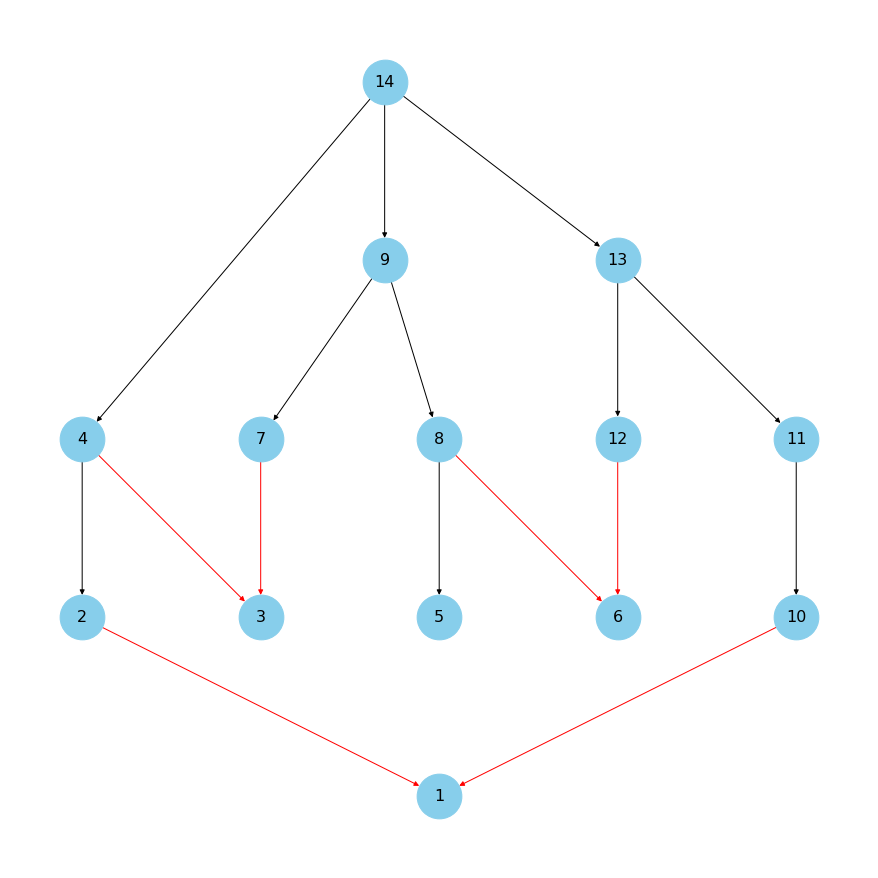

In [117]:
draw_graph(data_14)

In [118]:
def draw_dijkstra_graph(data):
    nref = data["nref"][0]
    N = data["N"]
    E = data["E"]
    R = data["R"]
    G = nx.DiGraph()
    G.add_nodes_from(N)
    G.add_edges_from(E)
    
    plt.figure(3,figsize=(12,12)) 
    pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
    
    for edge in E:
        G[edge[0]][edge[1]]["weight"] = R[edge]
        
    path_lengths = nx.single_source_dijkstra_path_length(G, nref, weight='weight')
    

    active_edges = []
    for node in path_lengths:
        path = nx.shortest_path(G, source=nref, target=node, weight='weight')
        active_edges.extend([(path[i], path[i+1]) for i in range(len(path)-1)])

    edge_colors = ['black' if edge in active_edges else 'white' for edge in G.edges()]
    nx.draw(G, node_size=2000, node_color="skyblue", pos=pos, with_labels=True, edge_color=edge_colors)

    plt.show()

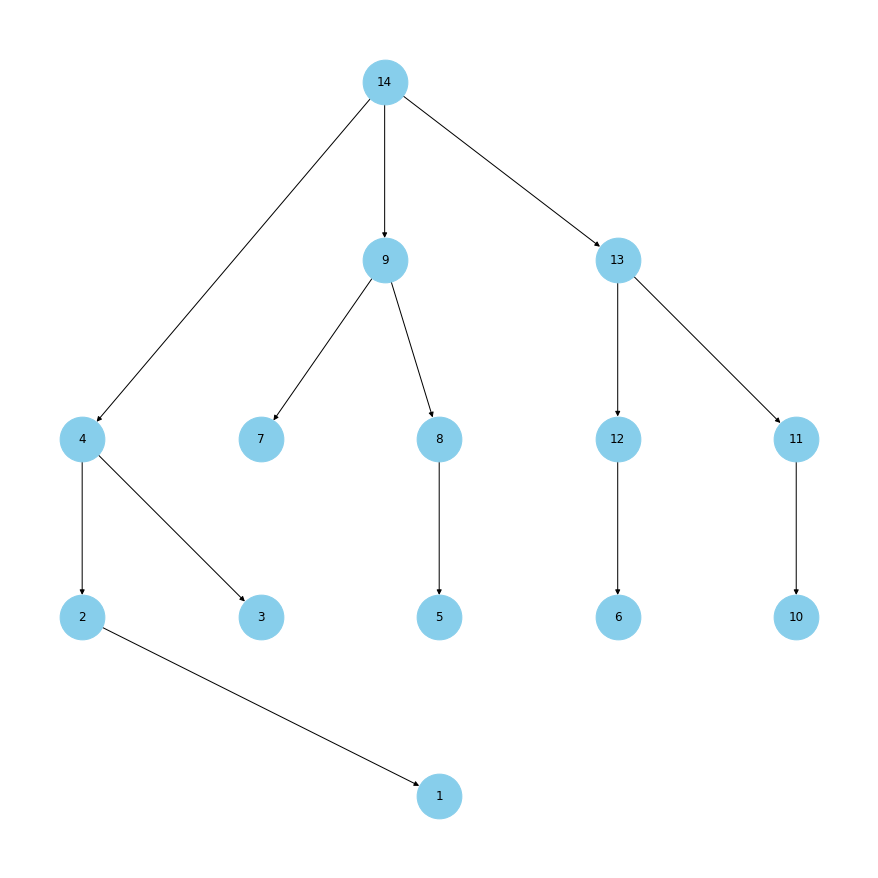

In [119]:
draw_dijkstra_graph(data_14)

## Escritura de resultados
Para poder usar los datos obtenidos de la resolución del modelo se creo un método que permite escribir los resultados generales del modelo, los valores asociados a los nodos y los asociados a los arcos en un archivo de excel. Esto con el objetivo de poder revisar más fácilmente las métricas de la solución y los valores obtenidos.

In [17]:
def write_data(data, model, time=None, name="results"):
    N = data["N"]
    E = data["E"]
    print
    workbook = xlsxwriter.Workbook(f'{name}.xlsx')

    main_results = workbook.add_worksheet("Main Results")

    main_results.write('A1', 'Edges')
    main_results.write('B1', 'Active Power Loss')
    main_results.write('C1', 'Runtime (s)')
    main_results.write('D1', 'Iterations')
    main_results.write('E1', 'Gap (%)')
    main_results.write('A2', ', '.join([f'{edge[0]}-{edge[1]}' for edge in E if model.getVarByName(f'y[{edge[0]},{edge[1]}]').X == 1 ]))
    main_results.write('B2', model.getObjective().getValue())
    main_results.write('C2', model.Runtime if time == None else time)
    main_results.write('D2', model.IterCount)
    main_results.write('E2', model.MIPGap)

    node_results = workbook.add_worksheet("Nodes Results")

    node_results.write('A1', 'Nodes')
    node_results.write('B1', 'Pg')
    node_results.write('C1', 'Qg')
    node_results.write('D1', 'V')
    
    for index, node in enumerate(N):
        node_results.write(f'A{index + 2}', node)
        node_results.write(f'B{index + 2}', model.getVarByName(f'Pg[{node}]').X)
        node_results.write(f'C{index + 2}', model.getVarByName(f'Qg[{node}]').X)
        node_results.write(f'D{index + 2}', model.getVarByName(f'V[{node}]').X)

    edge_results = workbook.add_worksheet("Edges Results")

    edge_results.write('A1', 'Edges')
    edge_results.write('B1', 'P')
    edge_results.write('C1', 'Q')
    edge_results.write('D1', 'I')
    
    for index, edge in enumerate(E):
        edge_results.write(f'A{index + 2}', f'{edge[0]}-{edge[1]}')
        edge_results.write(f'B{index + 2}', model.getVarByName(f'P[{edge[0]},{edge[1]}]').X)
        edge_results.write(f'C{index + 2}', model.getVarByName(f'Q[{edge[0]},{edge[1]}]').X)
        edge_results.write(f'D{index + 2}', model.getVarByName(f'I[{edge[0]},{edge[1]}]').X)
        
    workbook.close()

In [18]:
write_data(data_84, m, time_m)

# Comandos importantes

#### Instalar la libreria para poder ubicar correctamente los nodos en forma de arbol
```conda install -c conda-forge pygraphviz```

#### Instalar la libreria para escribir en archivos de excel
```pip install xlsxwriter ```